In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import numpy as np
import statsmodels.api as sm

In [ ]:
weight = pd.read_csv('/content/저체중률.csv')
weight.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],axis=0,inplace=True)
weight.drop(['구분별(1)','구분별(2)'],axis=1,inplace=True)
weight.drop(['2019.1','2019.2','2020','2020.1','2020.2','2021','2021.1','2021.2'],axis=1,inplace=True)
weight.rename(columns={'구분별(3)':'자치구','2019':'저체중률'}, inplace=True)
weight.reset_index(drop=True, inplace=True)
weight['저체중률'] = weight['저체중률'].astype('float')

KeyError: ignored

In [5]:
weight = pd.read_csv('/content/저체중률.csv',encoding='cp949')

In [7]:
group3.corr(method='pearson', min_periods=1)

<ipython-input-7-ea66cb0b78aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  group3.corr(method='pearson', min_periods=1)


,기초생활수급자인원,노년부양비,독거노인수,고령자수,무료급식소개수
기초생활수급자인원,1.000000,0.424785,0.933608,0.452600,0.574250
노년부양비,0.424785,1.000000,0.531019,0.073654,0.223712
독거노인수,0.933608,0.531019,1.000000,0.392830,0.597620
고령자수,0.452600,0.073654,0.392830,1.000000,0.297891
무료급식소개수,0.574250,0.223712,0.597620,0.297891,1.000000


In [13]:
group3 = pd.read_csv('/content/group3.csv',encoding='cp949')
group3 = group3.drop(['Unnamed: 0'],axis=1)
group3

,자치구,행정동,기초생활수급자인원,노년부양비,독거노인수,고령내국인전체,노령화지수,무료급식소개수
0,서초구,서초1동,356,20.5,143,3140,144.9,1
1,서초구,서초2동,157,17.1,68,3396,94.6,0
2,서초구,서초3동,359,20.4,121,5002,177.9,0
3,서초구,서초4동,70,20.4,30,4346,90.0,0
4,서초구,잠원동,254,17.4,116,3397,98.0,0
...,...,...,...,...,...,...,...,...
62,송파구,잠실2동,33,21.7,16,4616,144.2,0
63,송파구,잠실3동,54,11.7,28,3583,34.9,0
64,송파구,장지동,1680,17.3,356,3896,216.1,0
65,송파구,위례동,1090,20.8,206,2974,75.1,0


In [9]:
weight = weight.drop(['Unnamed: 0'],axis=1)
weight

,자치구,저체중률
0,종로구,5.3
1,중구,5.3
2,용산구,3.8
3,성동구,6.7
4,광진구,6.5
5,동대문구,2.7
6,중랑구,3.7
7,성북구,4.8
8,강북구,5.7
9,도봉구,4.8


In [10]:
weight['저체중률'] = weight['저체중률'].astype('float')

In [15]:
group3=group3[['자치구','행정동', '기초생활수급자인원', '노년부양비', '독거노인수', '고령내국인전체', '노령화지수', '무료급식소개수']]
group3.iloc[249,0]='강남구'

IndexError: ignored

In [16]:
final_group3 = pd.merge(group3,weight, on = '자치구')
final_group3

,자치구,행정동,기초생활수급자인원,노년부양비,독거노인수,고령내국인전체,노령화지수,무료급식소개수,저체중률
0,서초구,서초1동,356,20.5,143,3140,144.9,1,8.3
1,서초구,서초2동,157,17.1,68,3396,94.6,0,8.3
2,서초구,서초3동,359,20.4,121,5002,177.9,0,8.3
3,서초구,서초4동,70,20.4,30,4346,90.0,0,8.3
4,서초구,잠원동,254,17.4,116,3397,98.0,0,8.3
...,...,...,...,...,...,...,...,...,...
62,송파구,잠실7동,11,26.2,4,6070,125.4,0,4.6
63,송파구,잠실2동,33,21.7,16,4616,144.2,0,4.6
64,송파구,잠실3동,54,11.7,28,3583,34.9,0,4.6
65,송파구,장지동,1680,17.3,356,3896,216.1,0,4.6


In [19]:
data = final_group3.copy()
data.head(5)

,자치구,행정동,기초생활수급자인원,노년부양비,독거노인수,고령내국인전체,노령화지수,무료급식소개수,저체중률
0,서초구,서초1동,356,20.5,143,3140,144.9,1,8.3
1,서초구,서초2동,157,17.1,68,3396,94.6,0,8.3
2,서초구,서초3동,359,20.4,121,5002,177.9,0,8.3
3,서초구,서초4동,70,20.4,30,4346,90.0,0,8.3
4,서초구,잠원동,254,17.4,116,3397,98.0,0,8.3


In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [23]:
data2 = pd.DataFrame(ss.fit_transform(data.iloc[:,[2,3,5,6,7,8]]))
data2.rename(columns={0:'기초생활수급자인원',1:'노년부양비',2:'고령내국인전체',3:'노령화지수',4:'무료급식소개수'},inplace=True)
data2=pd.concat([data2,data.loc[:,'저체중률']],axis=1)

In [26]:
data2

,기초생활수급자인원,노년부양비,고령내국인전체,노령화지수,무료급식소개수,5,저체중률
0,-0.358217,-0.293011,-0.468145,-0.203908,1.243799,1.416472,8.3
1,-0.668193,-0.790386,-0.249788,-0.770945,-0.456906,1.416472,8.3
2,-0.353544,-0.307639,1.120057,0.168104,-0.456906,1.416472,8.3
3,-0.803710,-0.307639,0.560519,-0.822802,-0.456906,1.416472,8.3
4,-0.517099,-0.746500,-0.248936,-0.732617,-0.456906,1.416472,8.3
...,...,...,...,...,...,...,...
62,-0.895612,0.540825,2.031013,-0.423734,-0.456906,-1.061604,4.6
63,-0.861343,-0.117466,0.790816,-0.211800,-0.456906,-1.061604,4.6
64,-0.828632,-1.580336,-0.090286,-1.443949,-0.456906,-1.061604,4.6
65,1.704134,-0.761129,0.176689,0.598736,-0.456906,-1.061604,4.6


In [30]:
data2 = data2[['기초생활수급자인원','노년부양비','고령내국인전체','노령화지수','무료급식소개수','저체중률']]
data2

,기초생활수급자인원,노년부양비,고령내국인전체,노령화지수,무료급식소개수,저체중률
0,-0.358217,-0.293011,-0.468145,-0.203908,1.243799,8.3
1,-0.668193,-0.790386,-0.249788,-0.770945,-0.456906,8.3
2,-0.353544,-0.307639,1.120057,0.168104,-0.456906,8.3
3,-0.803710,-0.307639,0.560519,-0.822802,-0.456906,8.3
4,-0.517099,-0.746500,-0.248936,-0.732617,-0.456906,8.3
...,...,...,...,...,...,...
62,-0.895612,0.540825,2.031013,-0.423734,-0.456906,4.6
63,-0.861343,-0.117466,0.790816,-0.211800,-0.456906,4.6
64,-0.828632,-1.580336,-0.090286,-1.443949,-0.456906,4.6
65,1.704134,-0.761129,0.176689,0.598736,-0.456906,4.6


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [32]:
group1_ss=data2.drop('저체중률',axis=1)
group1_ss

,기초생활수급자인원,노년부양비,고령내국인전체,노령화지수,무료급식소개수
0,-0.358217,-0.293011,-0.468145,-0.203908,1.243799
1,-0.668193,-0.790386,-0.249788,-0.770945,-0.456906
2,-0.353544,-0.307639,1.120057,0.168104,-0.456906
3,-0.803710,-0.307639,0.560519,-0.822802,-0.456906
4,-0.517099,-0.746500,-0.248936,-0.732617,-0.456906
...,...,...,...,...,...
62,-0.895612,0.540825,2.031013,-0.423734,-0.456906
63,-0.861343,-0.117466,0.790816,-0.211800,-0.456906
64,-0.828632,-1.580336,-0.090286,-1.443949,-0.456906
65,1.704134,-0.761129,0.176689,0.598736,-0.456906


In [33]:
from statsmodels.formula.api import ols
ols('저체중률 ~ 기초생활수급자인원+노년부양비+고령내국인전체+노령화지수+무료급식소개수', data=data2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   저체중률   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.511
Date:                Sat, 04 Nov 2023   Prob (F-statistic):             0.0393
Time:                        03:06:11   Log-Likelihood:                -115.66
No. Observations:                  67   AIC:                             243.3
Df Residuals:                      61   BIC:                             256.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1851      0.174     35.528      0.000       5.837       6.533
기초생활수급자인원     -0.1528      0.293     -0.521      0.604      -0.739       0.434
노년부양비          0.2720      0.243      1.118      0.268      -0.214       0.758
고령내국인전체       -0.2707      0.208     -1.303      0.198      -0.686       0.145
노령화지수         -0.5809      0.296     -1.964      0.054      -1.172       0.011
무료급식소개수        0.5425      0.213      2.545      0.013       0.116       0.969
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                3.259
Skew:                           0.221   Prob(JB):                        0.196
Kurtosis:                       2.014   Cond. No.                         3.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
group3

,자치구,행정동,기초생활수급자인원,노년부양비,독거노인수,고령내국인전체,노령화지수,무료급식소개수
0,서초구,서초1동,356,20.5,143,3140,144.9,1
1,서초구,서초2동,157,17.1,68,3396,94.6,0
2,서초구,서초3동,359,20.4,121,5002,177.9,0
3,서초구,서초4동,70,20.4,30,4346,90.0,0
4,서초구,잠원동,254,17.4,116,3397,98.0,0
...,...,...,...,...,...,...,...,...
62,송파구,잠실2동,33,21.7,16,4616,144.2,0
63,송파구,잠실3동,54,11.7,28,3583,34.9,0
64,송파구,장지동,1680,17.3,356,3896,216.1,0
65,송파구,위례동,1090,20.8,206,2974,75.1,0


In [36]:
group3_score = group3.copy()
group3_score= group3_score[['자치구','행정동']]
group3_score['점수'] = 0
group3_score['점수'] = group3_score['점수'].astype('float')
group3_score

,자치구,행정동,점수
0,서초구,서초1동,0.0
1,서초구,서초2동,0.0
2,서초구,서초3동,0.0
3,서초구,서초4동,0.0
4,서초구,잠원동,0.0
...,...,...,...
62,송파구,잠실2동,0.0
63,송파구,잠실3동,0.0
64,송파구,장지동,0.0
65,송파구,위례동,0.0


In [37]:
data

,자치구,행정동,기초생활수급자인원,노년부양비,독거노인수,고령내국인전체,노령화지수,무료급식소개수,저체중률
0,서초구,서초1동,356,20.5,143,3140,144.9,1,8.3
1,서초구,서초2동,157,17.1,68,3396,94.6,0,8.3
2,서초구,서초3동,359,20.4,121,5002,177.9,0,8.3
3,서초구,서초4동,70,20.4,30,4346,90.0,0,8.3
4,서초구,잠원동,254,17.4,116,3397,98.0,0,8.3
...,...,...,...,...,...,...,...,...,...
62,송파구,잠실7동,11,26.2,4,6070,125.4,0,4.6
63,송파구,잠실2동,33,21.7,16,4616,144.2,0,4.6
64,송파구,잠실3동,54,11.7,28,3583,34.9,0,4.6
65,송파구,장지동,1680,17.3,356,3896,216.1,0,4.6


In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data2 = pd.DataFrame(ss.fit_transform(data.iloc[:,[2,3,5,6,7]]))
data2.rename(columns={0:'기초생활수급자인원',1:'노년부양비',2:'고령내국인전체',3:'노령화지수',4:'무료급식소개수'},inplace=True)
data2=pd.concat([data2,data.loc[:,'저체중률']],axis=1)

In [39]:
data_ahp = data2.iloc[:,[0,1,2,3,4]].corr()
data_ahp

,기초생활수급자인원,노년부양비,고령내국인전체,노령화지수,무료급식소개수
기초생활수급자인원,1.000000,0.424785,0.452600,0.623918,0.574250
노년부양비,0.424785,1.000000,0.073654,0.696000,0.223712
고령내국인전체,0.452600,0.073654,1.000000,0.049660,0.297891
노령화지수,0.623918,0.696000,0.049660,1.000000,0.321897
무료급식소개수,0.574250,0.223712,0.297891,0.321897,1.000000


In [40]:
colums_cnt= len(data_ahp.columns)
colums_cnt

5

In [41]:
from scipy.stats.mstats import gmean
geo_mean_list = []
for i in data_ahp:
    geo_mean_list.append(gmean(data_ahp[i]))

In [43]:
# 기하평균 출력
print('기하평균')
for i,j in zip(data_ahp, geo_mean_list):
    print('{} : {}'.format(i, j))
    print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

기하평균
기초생활수급자인원 : 0.5856287167105227
기초생활수급자인원 : 0.586
노년부양비 : 0.3447730490837648
노년부양비 : 0.345
고령내국인전체 : 0.21807003796970773
고령내국인전체 : 0.218
노령화지수 : 0.37007761839463704
노령화지수 : 0.37
무료급식소개수 : 0.4150620996606525
무료급식소개수 : 0.415


In [44]:
pd.Series(geo_mean_list)

0    0.585629
1    0.344773
2    0.218070
3    0.370078
4    0.415062
dtype: float64

In [45]:
# 가중치 계산을 위하여 기하평균의 합을 구함
geo_mean_sum = sum(geo_mean_list)
geo_mean_sum

1.9336115218192849

In [46]:
# 각 컬럼의 가중치를 계산하여 리스트에 저장
weights_list = []
for i in range(colums_cnt):
    weights_list.append(geo_mean_list[i]/geo_mean_sum)

In [48]:
#가중치 출력
print('가중치')
for i,j in zip(data_ahp, weights_list):
    print('{} : {}'.format(i, j))
    print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

가중치
기초생활수급자인원 : 0.30286782536314216
기초생활수급자인원 : 0.303
노년부양비 : 0.17830523101112722
노년부양비 : 0.178
고령내국인전체 : 0.11277861944292268
고령내국인전체 : 0.113
노령화지수 : 0.19139191829310193
노령화지수 : 0.191
무료급식소개수 : 0.214656405889706
무료급식소개수 : 0.215


In [49]:
#가중치 합 확인
summ = sum(list(weights_list))
print(summ)

1.0


In [50]:
index=['기초생활수급자인원','노년부양비','고령내국인전체','노령화지수','무료급식소개수']
가중치 = pd.DataFrame(weights_list, index=index)
가중치.rename(columns={0:'가중치'}, inplace=True)
가중치

,가중치
기초생활수급자인원,0.302868
노년부양비,0.178305
고령내국인전체,0.112779
노령화지수,0.191392
무료급식소개수,0.214656


In [51]:
x = list(가중치.index)
y = weights_list

In [53]:
plt.rc('font', family='Malgun Gothic')

In [55]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (42.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


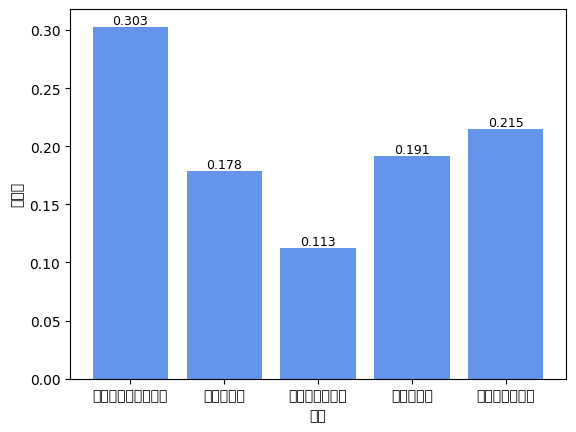

In [56]:
#그래프 한글 출력을 위함
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.bar(x, y, color=['cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','cornflowerblue','black'])
plt.xlabel('요인')
plt.ylabel('가중치')

# 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
for i, v in enumerate(x):
    plt.text(v, y[i],round(y[i],3),
             fontsize = 9,
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom', # verticalalignment (top, center, bottom)
            )

plt.show()

In [ ]:
# 0.303  / 0.178 / 0.113 / 0.191 / 0.215

In [57]:
def AHP_5(a, b, c, d, e, f, g, h, i, j): # 요소가 5개인 경우 AHP분석 함수
    np01 = np.array([[1, a, b, c, d], [1/a, 1, e, f, g], [1/b, 1/e, 1, h, i], [1/c, 1/f, 1/h, 1, j], [1/d, 1/g, 1/i, 1/j, 1]])
    col_sums = np01.sum(axis=0)
    np02 = np01 / col_sums[np.newaxis, :]
    row_avg = np02.mean(axis=1) # 최종중요도(가중치)
    np03 = np01.dot(row_avg[:, np.newaxis])/row_avg[:, np.newaxis]
    consistency = (np03.mean(axis=0)-5)/4  # 일관성 지수
    return row_avg, consistency

In [58]:
a = gmean(data_ahp.iloc[0,1])
b = gmean(data_ahp.iloc[0,2])
c = gmean(data_ahp.iloc[0,3])
d = gmean(data_ahp.iloc[0,4])
e = gmean(data_ahp.iloc[1,2])
f = gmean(data_ahp.iloc[1,3])
g = gmean(data_ahp.iloc[1,4])
h = gmean(data_ahp.iloc[2,3])
i = gmean(data_ahp.iloc[2,4])
j = gmean(data_ahp.iloc[3,4])
for x, y in zip([a, b, c, d, e, f, g, h, i, j], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']):
    print('기하평균({}) : {}'.format(y, x))
    row_avg, consistency = AHP_5(a, b, c, d, e, f, g, h, i, j)
for i, j in zip(['기초생활수급자인원', '노년부양비', '고령내국인전체', '노령화지수', '무료급식소개수'], row_avg):
    print('최종 중요도({}) : {}'.format(i, j))
print('일관성 지수 : {}'.format(consistency[0]))

기하평균(a) : 0.42478481029907006
기하평균(b) : 0.45259983807017884
기하평균(c) : 0.6239176089798184
기하평균(d) : 0.5742502681712174
기하평균(e) : 0.07365431224926285
기하평균(f) : 0.696000380051046
기하평균(g) : 0.22371232654710668
기하평균(h) : 0.049660406122502866
기하평균(i) : 0.2978908449037672
기하평균(j) : 0.3218971386029205
최종 중요도(기초생활수급자인원) : 0.10042302855675271
최종 중요도(노년부양비) : 0.10693508448187364
최종 중요도(고령내국인전체) : 0.21392657475148838
최종 중요도(노령화지수) : 0.27384492283431044
최종 중요도(무료급식소개수) : 0.3048703893755748
일관성 지수 : 1.1238431331343839


In [ ]:
#일관성 지수가 1.12 정도 나옴... (?)

In [59]:
group3_score = group3.copy()
group3_score= group3_score[['자치구','행정동']]
group3_score['점수'] = 0
group3_score['점수'] = group3_score['점수'].astype('float')
group3_score.head()

,자치구,행정동,점수
0,서초구,서초1동,0.0
1,서초구,서초2동,0.0
2,서초구,서초3동,0.0
3,서초구,서초4동,0.0
4,서초구,잠원동,0.0


In [61]:
def score(dataframe1, dataframe2):
    for i in range(len(dataframe1)):
        dataframe1.loc[i,'점수'] = 0.303 * dataframe2.loc[i,'기초생활수급자인원'] + 0.178 * dataframe2.loc[i,'노년부양비'] + 0.113 * dataframe2.loc[i,'고령내국인전체'] + 0.191 * dataframe2.loc[i,'노령화지수'] + 0.215 * dataframe2.loc[i,'무료급식소개수']

In [ ]:
# 0.303  / 0.178 / 0.113 / 0.191 / 0.215

In [62]:
pd.set_option('display.max_rows', None)
score(group3_score,data2)

group3_score = group3_score.sort_values('점수', ascending=False)

group3_score
group3_score.reset_index(drop=True)

,자치구,행정동,점수
0,강남구,수서동,3.958071
1,서초구,양재1동,2.125286
2,강남구,일원1동,1.687268
3,강남구,세곡동,1.302064
4,송파구,방이1동,1.076529
5,송파구,마천2동,1.028869
6,송파구,송파1동,0.779506
7,송파구,가락본동,0.537668
8,강남구,논현1동,0.480659
9,강남구,역삼1동,0.418352
